# QCTO - Workplace Module

## Stocking Up on L'Oréal: A Prediction Model
#### Done By: Mahlatse Masemola

© ExploreAI 2024

<div align="center" style="font-size: 50%; text-align: center; margin: 0 auto;">
    <img src="https://cloudfront-us-east-2.images.arcpublishing.com/reuters/3L7GCBXE3ZP6FFQMTUA3J2TARY.jpg" 
         style="display: block; margin-left: auto; margin-right: auto; width: 80%; height: 300px; object-fit: cover;" />
</div>

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Background Information:**
L'Oréal has a diverse portfolio of brands and operates in a highly competitive industry that includes other major players such as Estée Lauder and Coty. The company’s stock price is influenced by a complex interplay of internal factors (like product launches and earnings reports) and external factors (such as macroeconomic indicators and geopolitical events). This project aims to address the challenge of building a predictive model that accounts for this complexity.

* **Purpose:** 
The primary objective of this project is to build a robust machine learning model that predicts the future stock prices of L'Oréal. By leveraging historical stock price data and key financial indicators, the project aims to provide insights into the factors that influence L'Oréal's stock price movements. This predictive model can be used by investors, financial analysts, and other stakeholders to make informed decisions regarding L'Oréal's stock.
* **Details:**
> * <u>Problem Domain and Background:</u> 
L'Oréal, a global leader in the beauty and cosmetics industry, is listed on the Euronext Paris exchange under the ticker symbol "OR.PA." Like other publicly traded companies, L'Oréal's stock price is subject to fluctuations influenced by a multitude of factors, including market trends, company performance, consumer sentiment, and macroeconomic indicators. Predicting these price movements is a complex and challenging task, as the market is inherently volatile and affected by numerous interrelated variables. The project focuses on creating a data-driven approach to forecast L'Oréal’s stock prices by analyzing historical data such as opening prices, closing prices, daily highs and lows, adjusted closing prices, and trading volumes. This historical data provides a foundational understanding of how the stock has behaved over time and enables the development of predictive models that can capture patterns and trends.
> * <u>Project Challenges Addressed:</u>
>> Specific Questions and Challenges:
>>> 1.**Market Volatility:** Understanding and modeling the inherent volatility in L'Oréal's stock price, especially during times of economic uncertainty or significant market events.     
>>> 2.**Data-Driven Insights:** Identifying key financial indicators that have a significant impact on the stock price, such as trading volumes or large fluctuations in daily prices.                    
>>> 3.**Model Performance:** Evaluating the performance of different machine learning models to ensure accurate and reliable predictions that can be used by stakeholders to make investment decisions.
> * <u> Project Related URL's:</u>
>> * Trello Board: https://trello.com/b/2VxjXGsG/cap-stone-project-stocking-up-on-loreal-a-prediction-model                                                                                                 
>>* Github:https://github.com/MahlatseMasemola/L_Oreal_Stock_Price_Prediction_Model
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [107]:
#Packages required for Data Collection
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

#Data Manipulation
import numpy as np
from sklearn.preprocessing import StandardScaler

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sn

#Data Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Hyper-parameter tunning
from sklearn.model_selection import GridSearchCV



---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

**Data Collection:**                                                                                 
The data used in this project was collected using the yfinance library, which allows for easy access to historical stock price data from Yahoo Finance. This library utilizes Yahoo Finance's public API to fetch stock data, ensuring that the information is both accurate and up-to-date. The specific ticker symbol used for L'Oréal is "OR.PA," which represents its listing on the Euronext Paris exchange.The link used to obtain this data is https://finance.yahoo.com/quote/OR.PA/analysis/.

**Characteristics of the Dataset**

The dataset consists of historical stock price data for L'Oréal over the past five years, from 2019-09-23 to 2024-09-19. The following characteristics outline the dataset:
> <u>Size</u>: The dataset contains 1283 rows and 7 columns, representing daily stock prices for the specified time period.                                                                               
> <u>Dictionary</u>: The data consists og various attributes related to the stock's performance, including:
>> 1.Date: The date for each entry.                                                                     
>> 2.Open: The stock price at market opening.                                                           
>> 3.High: The highest stock price during the trading day.                                             
>> 4.Low: The lowest stock price during the trading day.                                               
>> 5.Close: The stock price at market closing.                                                         
>> 6.Volume: The total number of shares traded on that day.                                             
>> 7.Adjusted Close: The closing price adjusted for dividends and stock splits  .

**Types of Data**
The dataset primarily consists of numerical data types, including:
> <u>Numerical</u>: Prices (Open, High, Low, Close, Adjusted Close) and Volume.                       
> <u>Temporal</u>: The Date, which is essential for time series analysis.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [108]:
# Ticker symbol for L'Oréal
ticker_symbol = "OR.PA" 

# Calculation of the date five years ago and getting the historical data
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
data = yf.download(ticker_symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
data.reset_index(inplace=True)

# Display the first few rows of the data
data.head().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-04 00:00:00,251.000000,254.699997,250.500000,253.100006,233.067261,370094
1,2019-12-05 00:00:00,253.899994,254.199997,251.199997,251.199997,231.317642,352047
2,2019-12-06 00:00:00,252.699997,256.700012,251.600006,256.700012,236.382339,443765
3,2019-12-09 00:00:00,255.600006,256.100006,254.100006,254.199997,234.080200,283757
4,2019-12-10 00:00:00,254.000000,256.100006,250.199997,255.500000,235.277298,422184


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [109]:
# Create a copy of your DataFrame
data_copy = data.copy()
data_copy.describe().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})

,Date,Open,High,Low,Close,Adj Close,Volume
count,1282,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,2022-06-03 07:31:32.667706624,357.206357,360.673791,353.661856,357.323245,343.159348,403593.978939
min,2019-12-04 00:00:00,205.199997,212.899994,196.000000,207.600006,191.168564,0.000000
25%,2021-03-05 18:00:00,311.562492,314.849991,308.512497,311.762512,294.486656,273818.500000
50%,2022-06-02 12:00:00,365.324997,368.900009,361.525009,364.600006,347.328064,353557.500000
75%,2023-08-30 18:00:00,403.575005,407.200012,400.487503,403.925011,394.793137,460106.000000
max,2024-11-29 00:00:00,457.950012,461.850006,456.149994,456.899994,456.899994,2569157.000000
std,nan,58.492444,58.463807,58.476516,58.377950,62.797906,223441.572020


In [110]:
def data_cleaning(data):
    #1. Handle missing values
    data.dropna(inplace=True)
    
    #2. Handle duplicates
    data.drop_duplicates(inplace=True)
    
    #3. Ensure that the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    #4. Change naming convention from 'Adj Close' to 'Adj_Close'
    data.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
    
    return data

# Applying the function to the dataset
data = data_cleaning(data_copy)

# Print number of missing values and duplicates, and data types after data-cleaning
num_missing_values = data_copy.isnull().sum()
num_duplicates = data_copy.duplicated().sum()
data_types = data_copy.dtypes

print(f"Number of missing values:\n{num_missing_values}\n")
print(f"Number of duplicate rows: {num_duplicates}\n")
print("Data Types After Cleaning:")
print(data_types)

Number of missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

Number of duplicate rows: 0

Data Types After Cleaning:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume                int64
dtype: object


In [111]:
 # Display the first few rows of the data after data cleaning
data_copy.head().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-12-04 00:00:00,251.000000,254.699997,250.500000,253.100006,233.067261,370094
1,2019-12-05 00:00:00,253.899994,254.199997,251.199997,251.199997,231.317642,352047
2,2019-12-06 00:00:00,252.699997,256.700012,251.600006,256.700012,236.382339,443765
3,2019-12-09 00:00:00,255.600006,256.100006,254.100006,254.199997,234.080200,283757
4,2019-12-10 00:00:00,254.000000,256.100006,250.199997,255.500000,235.277298,422184


In [112]:
def preprocess_data(df):
    # 1. Handling Outliers
    def handle_outliers(column):
        lower_bound = np.percentile(column, 5)
        upper_bound = np.percentile(column, 95)
        return np.clip(column, lower_bound, upper_bound)
    
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = handle_outliers(df[col])
    
    # 2. Feature Scaling: Using StandardScaler to scale features to have mean 0 and variance 1
    scaler = StandardScaler()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df

data_copy = preprocess_data(data_copy)


In [113]:
 # Display the first few rows of the data after data preprocessing
data_copy.head().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})
   

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-12-04 00:00:00,-1.804711,-1.813106,-1.811676,-1.801745,-1.769367,-0.127562
1,2019-12-05 00:00:00,-1.804711,-1.813106,-1.811676,-1.801745,-1.769367,-0.242657
2,2019-12-06 00:00:00,-1.804711,-1.813106,-1.809997,-1.780751,-1.751422,0.342277
3,2019-12-09 00:00:00,-1.794236,-1.813106,-1.765812,-1.801745,-1.769367,-0.678177
4,2019-12-10 00:00:00,-1.804711,-1.813106,-1.811676,-1.801745,-1.769367,0.204643


In [114]:
def feature_engineering(df):
    # Moving Average
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    
    # Lagged Feature
    df['Lag_Close'] = df['Close'].shift(1)
    
    # Drop NaN values generated by moving average and lag
    df.dropna(inplace=True)
    
    return df

 # Display the first few rows of the data after feature engineering
data_copy = feature_engineering(data_copy)
data_copy.head().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})

,Date,Open,High,Low,Close,Adj_Close,Volume,SMA_20,Lag_Close
19,2020-01-02 00:00:00,-1.642835,-1.651948,-1.604976,-1.648437,-1.638330,-0.247421,-1.726635,-1.651965
20,2020-01-03 00:00:00,-1.700931,-1.701076,-1.650929,-1.653730,-1.642854,-0.619970,-1.719234,-1.648437
21,2020-01-06 00:00:00,-1.693889,-1.715113,-1.682743,-1.669607,-1.656425,-0.142064,-1.712627,-1.653730
22,2020-01-07 00:00:00,-1.646356,-1.692304,-1.680976,-1.729590,-1.707694,0.752836,-1.710069,-1.669607
23,2020-01-08 00:00:00,-1.715015,-1.748450,-1.700418,-1.701362,-1.683567,0.267220,-1.705050,-1.729590


In [115]:
#Saving the data as a csv file
data_copy.to_csv('LOreal Stock Price Cleaned Data.csv')

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


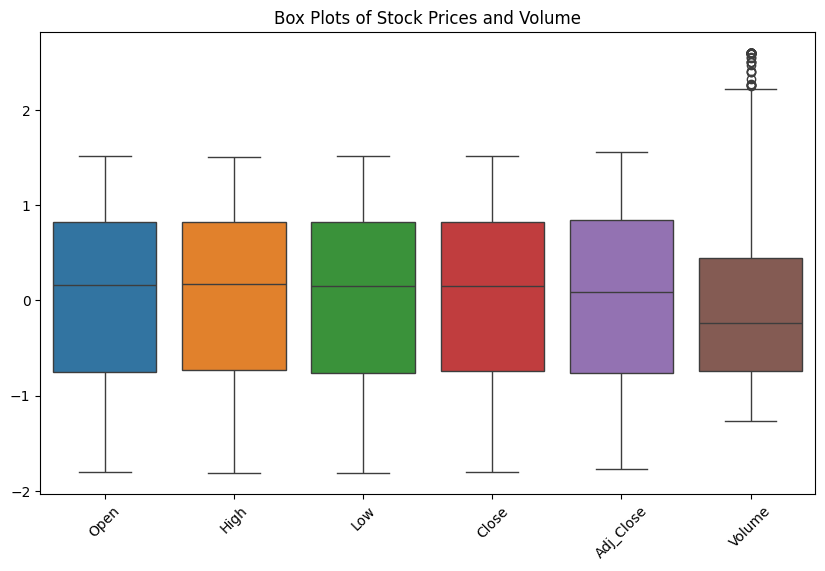

In [116]:
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

plt.figure(figsize=(10, 6))

sn.boxplot(data=data_copy[columns_to_plot])
plt.title('Box Plots of Stock Prices and Volume')
plt.xticks(rotation=45) 
plt.show()


**Insights:**

> <u> Price columns (Open, High, Low, Close, Adj_Close): </u> 
These columns show a fairly symmetrical distribution with no significant outliers. The medians for these price-related features are around the center of the boxes, indicating a balanced distribution. The whiskers are of similar length, meaning the data does not exhibit extreme variations.
> <u> Volume: </u>
This feature has noticeable outliers (represented as small circles) above the upper whisker, indicating that on some trading days, the volume of L'Oréal stock traded was significantly higher than usual. The interquartile range (IQR) is quite wide, reflecting variability in trading volumes, and the data has a right-skewed distribution due to these outliers.

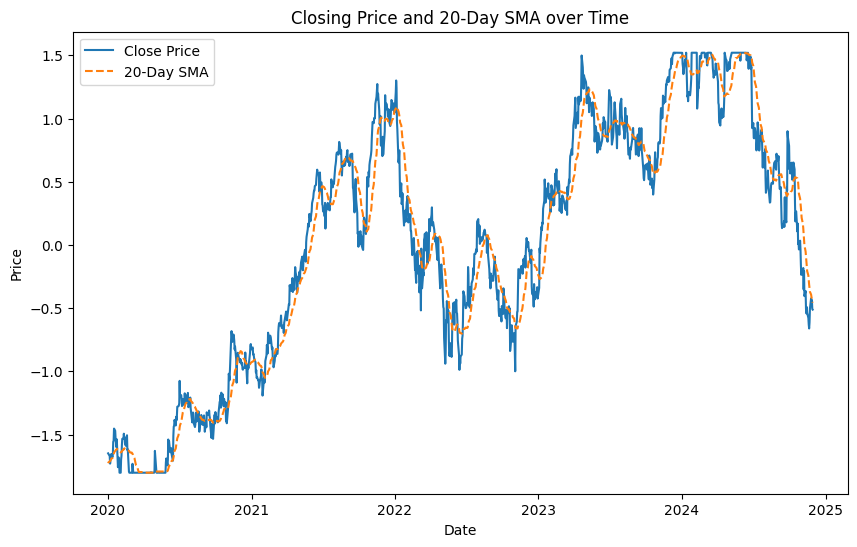

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(data_copy['Date'], data_copy['Close'], label='Close Price')
plt.plot(data_copy['Date'], data_copy['SMA_20'], label='20-Day SMA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and 20-Day SMA over Time')
plt.legend()
plt.show()

**Insights:**

> <u> In this time series plot:</u>

>> 1. Blue Line (Closing Price):
>>> * The blue line represents the normalized closing price of L'Oréal's stock over time, from around late 2019 to 2024.
>>> * The price shows cyclical patterns, with several peaks and troughs.
>>> * There is a steady increase in the price between 2020 and 2022, followed by some volatility starting in 2022 with noticeable ups and downs.

>> 2.Orange Dotted Line (20-Day SMA):
>>> * The orange line shows the 20-day Simple Moving Average (SMA), which smooths out short-term fluctuations in the stock price and provides a clearer trend direction.
>>> * The SMA follows the general direction of the closing price but with less short-term volatility.
>>> * In periods of rapid price increases or decreases, the SMA lags slightly behind the actual closing price due to its smoothing effect.


> <u> Key Observations:</u>
>> * 2020-2022: There's a strong upward trend with the closing price steadily increasing, and the 20-day SMA closely follows this trend.
>> * 2022-2023: The price becomes more volatile, with a significant drop around mid-2022 followed by a recovery and then another dip.
>> * 2023-2024: After reaching a high point, the stock undergoes some corrections and fluctuations, but the SMA still captures the broader trend of movement.

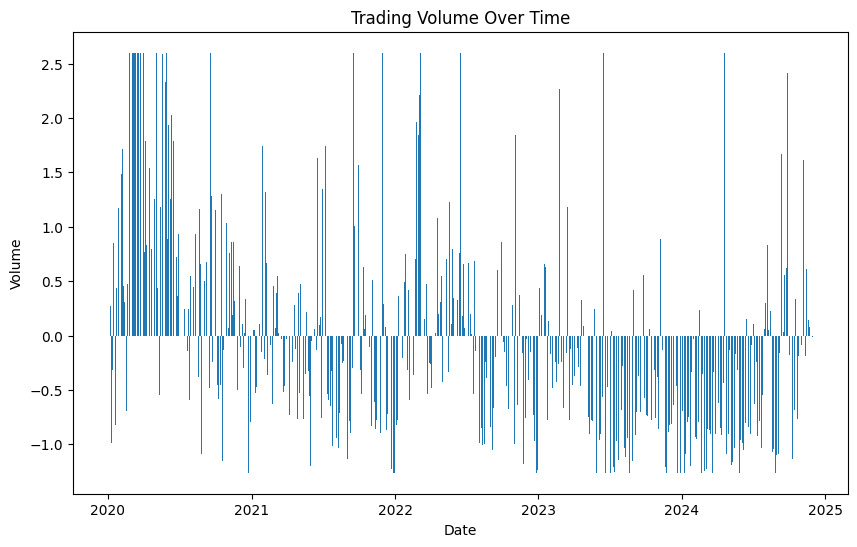

In [118]:
plt.figure(figsize=(10, 6))
plt.bar(data_copy['Date'], data_copy['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.show()

**Insights**
<u> Key Observations:</u>
> * 2020-2021: There are higher fluctuations in volume, suggesting frequent changes in trading activity during these years. The spikes indicate certain periods when trading volume surged.
> * 2022-2023: There is still volatility, though the trading volume seems to dip at certain periods, indicating less intense trading activity overall.
> * 2024 and beyond: The fluctuations continue, with alternating periods of high and low volume, which suggests that trading activity remains dynamic but inconsistent.

               Date      Open      High       Low     Close  Adj_Close  \
Date       1.000000  0.777766  0.780434  0.774379  0.776738   0.831649   
Open       0.777766  1.000000  0.998717  0.998637  0.997140   0.992134   
High       0.780434  0.998717  1.000000  0.998485  0.998798   0.993666   
Low        0.774379  0.998637  0.998485  1.000000  0.998665   0.993219   
Close      0.776738  0.997140  0.998798  0.998665  1.000000   0.994444   
Adj_Close  0.831649  0.992134  0.993666  0.993219  0.994444   1.000000   
Volume    -0.391161 -0.498862 -0.487859 -0.510644 -0.498810  -0.498848   
SMA_20     0.807298  0.980929  0.981094  0.978952  0.978762   0.980880   
Lag_Close  0.779030  0.998629  0.997634  0.997390  0.996008   0.991350   

             Volume    SMA_20  Lag_Close  
Date      -0.391161  0.807298   0.779030  
Open      -0.498862  0.980929   0.998629  
High      -0.487859  0.981094   0.997634  
Low       -0.510644  0.978952   0.997390  
Close     -0.498810  0.978762   0.996008  
A

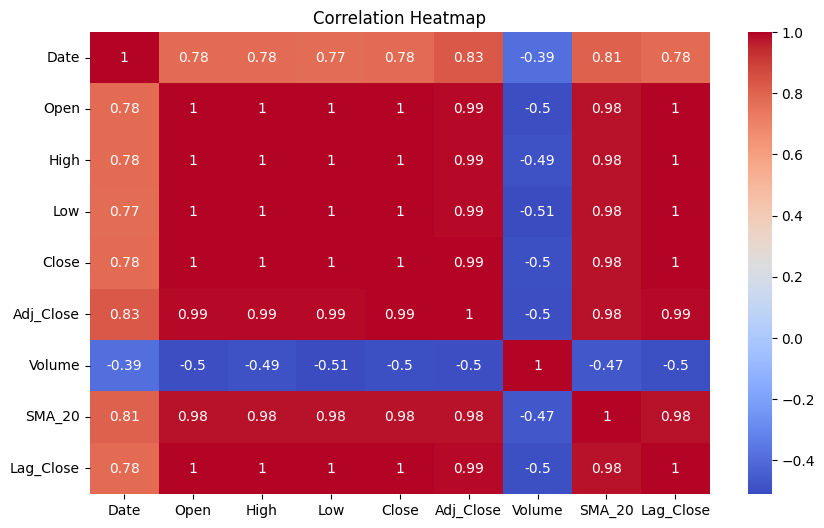

In [119]:
correlation_matrix = data_copy.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insights:**

> <u>Strong Positive Correlations:</u>
>> * Open, High, Low, Close, and Adj_Close: These variables exhibit very strong positive correlations with each other, which is expected as they represent different price points of the same asset.
>> * SMA_20 and Lag_Close: These variables also show strong positive correlations, suggesting that the 20-day Simple Moving Average (SMA) is closely related to the previous day's closing price.

> <u>Negative Correlation:</u>
>> * Volume and other variables: Volume has a negative correlation with all other variables, indicating that when the price of the asset is rising or falling, the trading volume tends to decrease.

> <u>Weak Correlations:</u>
>> * Date and other variables: The correlation between Date and other variables is generally weak, suggesting that the time factor has a limited impact on the price movements of the asset.

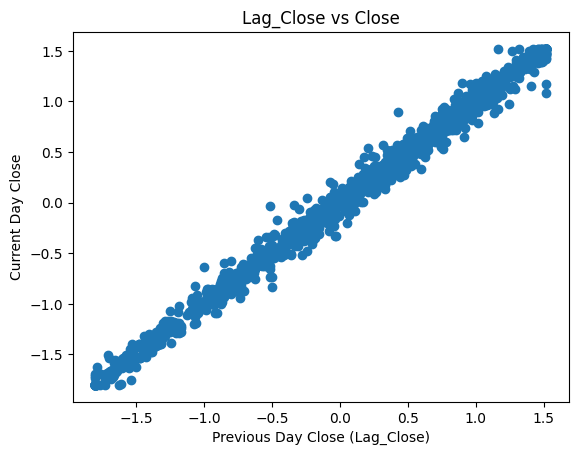

In [120]:
plt.scatter(data_copy['Lag_Close'], data_copy['Close'])
plt.xlabel('Previous Day Close (Lag_Close)')
plt.ylabel('Current Day Close')
plt.title('Lag_Close vs Close')
plt.show()

**Insights:**
> * <u>Strong Positive Correlation:</u> The points in the scatter plot are clustered along a diagonal line with a positive slope, indicating a strong positive correlation between the two variables. This means that when the previous day's closing price is high, the current day's closing price is also likely to be high, and vice versa.
> * <u>Linear Relationship:</u> The points appear to follow a linear trend, suggesting that the relationship between the two variables can be approximated by a straight line. This is consistent with the strong positive correlation observed.
> * <u>No Outliers:</u> There are no obvious outliers or points that deviate significantly from the general trend, suggesting that the relationship is relatively stable.

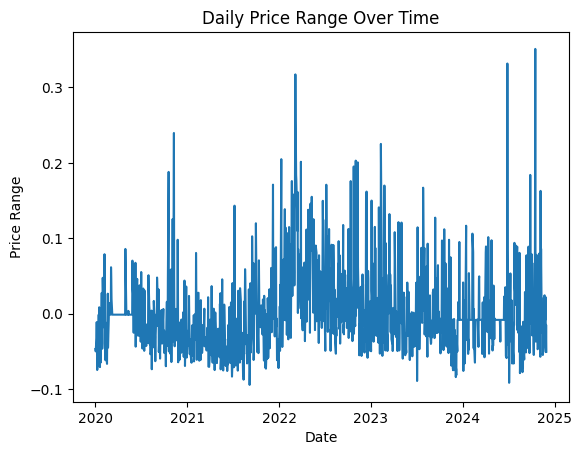

In [121]:
data_copy['Price_Range'] = data_copy['High'] - data_copy['Low']

plt.plot(data_copy['Date'], data_copy['Price_Range'])
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.title('Daily Price Range Over Time')
plt.show()

**Insights**
> * <u>Volatility:</u> The price range fluctuates significantly over time, indicating a volatile market. There are periods of high volatility with large price swings, as well as periods of low volatility with smaller price movements.
> * <u>No Clear Trend:</u> There is no clear upward or downward trend in the price range over the entire period. The chart shows a mix of upward and downward movements.
> * <u>Seasonal Patterns:</u> It is possible that there are seasonal patterns in the price range, but it is difficult to identify them clearly from this chart. More data and analysis would be needed to confirm any seasonal trends.

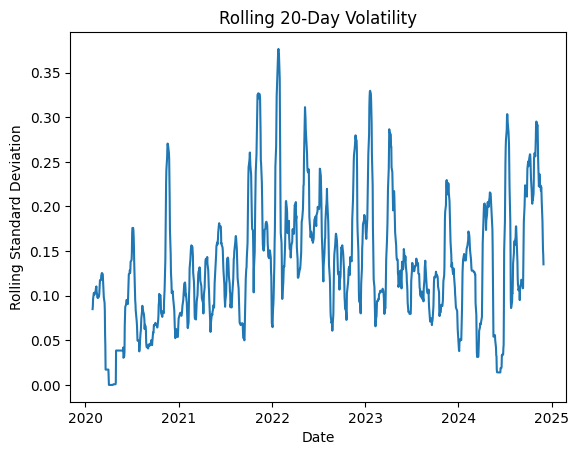

In [122]:
data_copy['Rolling_Std'] = data_copy['Close'].rolling(window=20).std()

plt.plot(data_copy['Date'], data_copy['Rolling_Std'])
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.title('Rolling 20-Day Volatility')
plt.show()

**Insights:**
> * <u>Volatility Fluctuations:</u> The volatility fluctuates significantly over time, indicating periods of high and low volatility. There are periods of sustained high volatility, as well as periods of relative calm.
> * <u>Clustering:</u> There are periods where the volatility appears to cluster together, suggesting that there may be underlying factors that are driving the volatility.

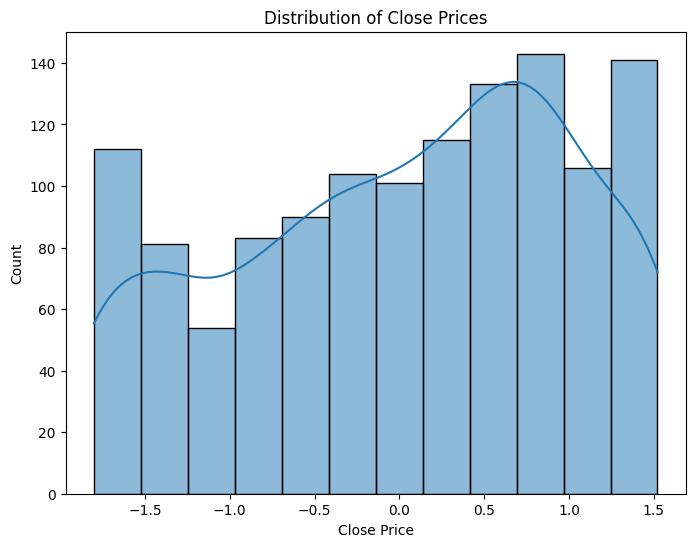

In [123]:
plt.figure(figsize=(8, 6))
sn.histplot(data_copy['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.show()

**Insights:**
> * <u>Skewness:</u> The distribution is slightly skewed to the left, indicating that there are more observations on the higher end of the closing price range.
> * <u>Multimodality:</u> The histogram shows multiple peaks, suggesting that there may be multiple modes or clusters of data points. This could indicate different market regimes or underlying factors influencing the closing prices.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


**Linear Regression:**
I included Linear Regression as a baseline model because it is simple and interpretable. It helps establish a foundational understanding of the data's trends and relationships, especially when the target variable (next day's closing price) might have a linear relationship with features like Open, High, and Low. 

**Random Forest:**
Random Forest was chosen because it handles non-linear relationships and interactions between features effectively. By leveraging multiple decision trees, it reduces the risk of overfitting and is robust to noise in the data. Additionally, it provides insights into feature importance, which is useful for understanding the impact of individual predictors. Random Forest’s ensemble nature reduces overfitting while capturing non-linear relationships in the data. The parameters are tuned for flexibility while keeping training time reasonable.

**Key Parameters:**

>> * *n_estimators=100*: Specifies the number of decision trees. A value of 100 is often sufficient for a good balance between performance and computational efficiency.
>> * *max_depth=None*: Allows the trees to grow until all leaves are pure or contain fewer samples than min_samples_split. This ensures the model captures as much information as possible.
>> * *min_samples_split=2*: Sets the minimum number of samples required to split a node. A low value ensures finer splits, capturing granular relationships.
>> * *random_state=42*: Ensures reproducibility by controlling the randomness in tree building.

**XGBoost:**
XGBoost is a powerful gradient boosting algorithm that is highly efficient and accurate for structured data like financial datasets. I selected this model for its ability to handle complex patterns, optimize using regularization, and minimize errors through iterative boosting, making it ideal for predictive tasks. XGBoost is known for its ability to model complex relationships while maintaining computational efficiency. The chosen parameters balance model performance with the need to prevent overfitting.

**Key Parameters:**

>> * *n_estimators=100*: Number of boosting rounds (iterations). Each round builds a new tree to correct errors made by previous trees.
>> * *learning_rate=0.1*: Determines the step size for updating weights after each boosting round. A lower value improves generalization but requires more rounds.
>> * *max_depth=6*: Limits the depth of each tree, controlling overfitting while allowing the model to capture sufficient complexity.
>> * *subsample=0.8*: Uses 80% of the training data for each boosting round to introduce randomness and reduce overfitting.
>> * *colsample_bytree=0.8:* Uses 80% of the features for each tree, ensuring diverse trees and improving robustness.
>> * *random_state=42*: Ensures reproducibility by fixing the seed for random number generation.

C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


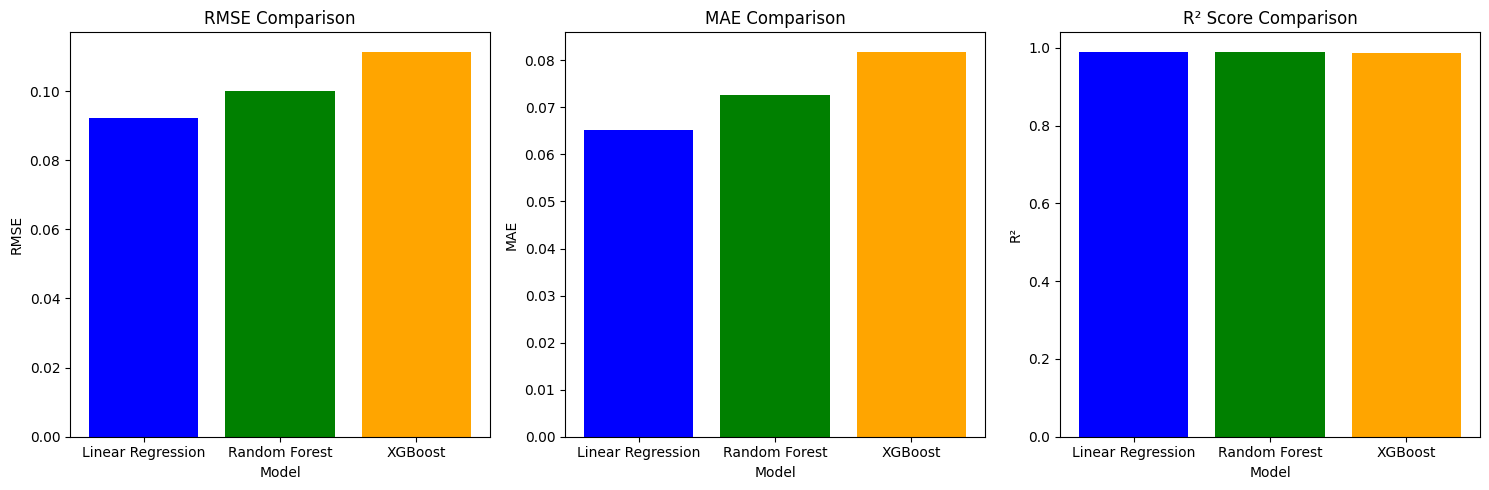

In [124]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'])

# Feature Engineering
data_copy['Year'] = data_copy['Date'].dt.year
data_copy['Month'] = data_copy['Date'].dt.month
data_copy['Day'] = data_copy['Date'].dt.day

# Create the target variable
data_copy['Target'] = data_copy['Close'].shift(-1) 
data_copy.dropna(inplace=True)

# Define features (X) and target (y)
X = data_copy[['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Month', 'Day']]
y = data_copy['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store metrics for comparison
models = ['Linear Regression', 'Random Forest', 'XGBoost']
metrics = {'Model': [], 'RMSE': [], 'MAE': [], 'R2': []}

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
metrics['Model'].append('Linear Regression')
metrics['RMSE'].append(mean_squared_error(y_test, y_pred_lr, squared=False))
metrics['MAE'].append(mean_absolute_error(y_test, y_pred_lr))
metrics['R2'].append(r2_score(y_test, y_pred_lr))

# Model 2: Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
metrics['Model'].append('Random Forest')
metrics['RMSE'].append(mean_squared_error(y_test, y_pred_rf, squared=False))
metrics['MAE'].append(mean_absolute_error(y_test, y_pred_rf))
metrics['R2'].append(r2_score(y_test, y_pred_rf))

# Model 3: XGBoost
xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
metrics['Model'].append('XGBoost')
metrics['RMSE'].append(mean_squared_error(y_test, y_pred_xgb, squared=False))
metrics['MAE'].append(mean_absolute_error(y_test, y_pred_xgb))
metrics['R2'].append(r2_score(y_test, y_pred_xgb))

# Convert metrics to DataFrame for plotting
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Bar plot for RMSE
ax[0].bar(metrics_df['Model'], metrics_df['RMSE'], color=['blue', 'green', 'orange'])
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE')
ax[0].set_xlabel('Model')

# Bar plot for MAE
ax[1].bar(metrics_df['Model'], metrics_df['MAE'], color=['blue', 'green', 'orange'])
ax[1].set_title('MAE Comparison')
ax[1].set_ylabel('MAE')
ax[1].set_xlabel('Model')

# Bar plot for R² Score
ax[2].bar(metrics_df['Model'], metrics_df['R2'], color=['blue', 'green', 'orange'])
ax[2].set_title('R² Score Comparison')
ax[2].set_ylabel('R²')
ax[2].set_xlabel('Model')

plt.tight_layout()
plt.show()

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

### Selected Metrics 

> **1. Root Mean Squared Error (RMSE)**
>>RMSE measures the average magnitude of errors by taking the square root of the average squared differences between predicted and actual values. It heavily penalizes larger errors.
>> *Why I selected RMSE*: It highlights how well the model handles large errors.

> **2. Mean Absolute Error (MAE)**
>>MAE calculates the average of the absolute differences between predicted and actual values, treating all errors equally without amplifying large ones.
>> *Why I selected MAE*: It provides a simple measure of the average prediction error, less influenced by outliers, making it useful for assessing general model accuracy.

> **3. R² (R-Squared)**
>>R² measures how well the model explains the variance in the target variable, with values ranging from 0 to 1. A higher R² indicates better model performance.
>> *Why I selected R²*: It indicates how well the model fits the data, showing whether the model captures the trends and patterns needed for accurate predictions.

In [125]:
### Model 1: Linear Regression ###
print("Linear Regression:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}\n")

### Model 2: Random Forest ###
print("Random Forest:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}\n")

### Model 3: XGBoost ###
print("XGBoost:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb)}\n")



Linear Regression:
RMSE: 0.09232339916809981
MAE: 0.06522061706470256
R2 Score: 0.9901584851270809

Random Forest:
RMSE: 0.10012851719860792
MAE: 0.07256720338684865
R2 Score: 0.988424121743073

XGBoost:
RMSE: 0.1114170387536804
MAE: 0.08185171607302805
R2 Score: 0.9856668513717323



C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [126]:
from sklearn.model_selection import GridSearchCV

# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],        
    'max_depth': [None, 10, 20],           
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]          
}

rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=rf_param_grid,
                       cv=5,               
                       scoring='neg_mean_squared_error',  
                       n_jobs=-1,         
                       verbose=2)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

# XGBoost Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.01, 0.1, 0.2],    
    'max_depth': [3, 6, 10],              
    'subsample': [0.8, 1.0],              
    'colsample_bytree': [0.8, 1.0]        
}

xgb_grid = GridSearchCV(estimator=XGBRegressor(random_state=42, use_label_encoder=False),
                        param_grid=xgb_param_grid,
                        cv=5,              
                        scoring='neg_mean_squared_error',  
                        n_jobs=-1,         
                        verbose=2)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

# Evaluate the best models on the test set
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)

# Metrics for Best Random Forest
print("Best Random Forest Performance:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_best_rf, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_best_rf)}\n")

# Metrics for Best XGBoost
print("Best XGBoost Performance:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_best_xgb, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best_xgb)}")
print(f"R2 Score: {r2_score(y_test, y_pred_best_xgb)}\n")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Random Forest Performance:
RMSE: 0.09809550918039255
MAE: 0.07044051511218791
R2 Score: 0.9888894225075516

Best XGBoost Performance:
RMSE: 0.0953639521059834
MAE: 0.07166088280674053
R2 Score: 0.9894995753440163



C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [22:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Selected Hyperparamter Tuning Method

GridSearchCV was chosen for hyperparameter tuning because it offers a comprehensive and systematic approach to finding the best combination of hyperparameters for a machine learning model. By exhaustively searching through a defined parameter grid, it ensures that the optimal configuration is found based on a chosen evaluation metric, such as RMSE. Additionally, GridSearchCV uses cross-validation, which helps to assess the model's performance on unseen data, reducing the risk of overfitting. This makes it an ideal choice for fine-tuning models, enabling them to achieve optimal performance on complex tasks such as stock price prediction.

In [127]:
# Import required metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)  
    mae = mean_absolute_error(y_test, predictions)               
    r2 = r2_score(y_test, predictions)                            
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

# Evaluate the tuned models
rf_metrics = evaluate_model(best_rf, X_test, y_test)
xgb_metrics = evaluate_model(best_xgb, X_test, y_test)

# Compare models based on RMSE
best_model = None
if rf_metrics["RMSE"] < xgb_metrics["RMSE"]:
    best_model = best_rf
    best_metrics = rf_metrics
    best_model_name = "Random Forest"
else:
    best_model = best_xgb
    best_metrics = xgb_metrics
    best_model_name = "XGBoost"


print(f"Best Model: {best_model_name}")
print(f"Performance Metrics: RMSE={best_metrics['RMSE']:.4f}, MAE={best_metrics['MAE']:.4f}, R2={best_metrics['R2']:.4f}")



Best Model: XGBoost
Performance Metrics: RMSE=0.0954, MAE=0.0717, R2=0.9895


C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


* The best-performing model is XGBoost, which showed better results in terms of accuracy and generalization. This model was fine-tuned using GridSearchCV to identify the optimal hyperparameters that would maximize its performance. 
>> After testing several configurations, the following XGBoost hyperparameters were selected:                                   
>> * colsample_bytree: 0.8                                                                                                       
>> * learning_rate: 0.1                                                                                                         
>> * max_depth: 3                                                                                                               
>> * n_estimators: 50                                                                                                           
>> * subsample: 1.0                                                                                                             

* Model Performance
>> The XGBoost model achieved the following performance metrics:
>> * RMSE: 0.0954                                                                                                               
>> * MAE: 0.0717                                                                                                                 
>> * R²: 0.9895                                                                                                                 

These metrics show that the model has a low error rate and does an excellent job explaining the variance in the target variable.

In [128]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for XGBoost
xgb_params = {
    'colsample_bytree': [0.8],      
    'learning_rate': [0.1],        
    'max_depth': [3],               
    'n_estimators': [50],           
    'subsample': [1.0]              
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor()

# GridSearchCV with 5-fold cross-validation to tune the parameters
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring='neg_root_mean_squared_error', verbose=1)

# Fit GridSearchCV on the training data 
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)
print("Best RMSE (Cross-Validation):", grid_search_xgb.best_score_)

# Get the best model with the selected hyperparameters
best_xgb = grid_search_xgb.best_estimator_

# Evaluate the model on the test set
y_pred = best_xgb.predict(X_test)

# Performance metrics on test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False) 
mae = mean_absolute_error(y_test, y_pred)                
r2 = r2_score(y_test, y_pred)                            

print(f"Best XGBoost Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best RMSE (Cross-Validation): -0.09330750768580562
Best XGBoost Performance:
RMSE: 0.0954
MAE: 0.0717
R2 Score: 0.9895


C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


**Conclusion**                                                                                                                   
This project aimed to develop a predictive model for stock price forecasting using historical stock data. After a thorough evaluation of various machine learning models, XGBoost emerged as the best performer, achieving an RMSE of 0.0954, an MAE of 0.0717, and an R² of 0.9895. These results indicate that XGBoost is highly effective in predicting stock prices, with a low level of error and a strong ability to explain the variance in the data. The model was fine-tuned using GridSearchCV, which allowed for the identification of the optimal hyperparameters, further improving its predictive accuracy.

The project demonstrated the importance of data preprocessing, model selection, and hyperparameter tuning in achieving high-quality predictions. By systematically optimizing the hyperparameters and evaluating various models, valuable insights were gained into the factors contributing to the model's success.

**Limitations**
While the XGBoost model performed well, the major limitation in the study is:
> *Feature Selection*: Although important features like Open, High, Low, and Close were included, additional features such as technical indicators (moving averages, volatility) or external factors (news sentiment, economic indicators) could enhance the model's ability to predict stock prices more accurately.

**Future Work** 
Several areas for future improvement and exploration include:
> 1. *Incorporating More Features*: Future iterations could benefit from the inclusion of additional features such as stock market indicators, sentiment analysis from financial news, or macroeconomic variables that impact stock prices. These could provide more context to the model and improve its predictive capabilities.
> 2. *Exploring Time-Series Models*: Given the sequential nature of stock data, models specifically designed for time-series forecasting, such as LSTM (Long Short-Term Memory) or ARIMA, may provide even more accurate predictions, especially for long-term forecasting.
> 3. *Real-Time Prediction*: Implementing the model in a real-time trading environment or using streaming data could allow for continuous predictions and adjustments, enabling the model to adapt to market changes in real time.

By addressing these limitations and exploring these future directions, this project can be refined further to provide even more accurate and robust stock price predictions.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

**References on Metrics**
1. Rainio, O., Teuho, J. & Klén, R. Evaluation metrics and statistical tests for machine learning. Sci Rep 14, 6086 (2024). https://doi.org/10.1038/s41598-024-56706-x 
2. Miller C, Portlock T, Nyaga DM, O'Sullivan JM. A review of model evaluation metrics for machine learning in genetics and genomics. Front Bioinform. 2024 Sep 10;4:1457619. doi: 10.3389/fbinf.2024.1457619. PMID: 39318760; PMCID: PMC11420621. https://pmc.ncbi.nlm.nih.gov/articles/PMC11420621/ 

**Dataset Sourcing**                                                                                                             
https://finance.yahoo.com/quote/OR.PA/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAMsIlBPGJhMUUPuwKrd6-GBLP3yCfdd0pIxcXFe2FPL07E4uiRwEo0nHK24H_05AuyqitV72ml4deoIYLLjSKwYSDQMgp1aqZO92Gf0nR9caFNQoUonskdr1fS0GDUR4-Y46DTqxm-B954eBuQanL2lA0PLO5Z_CYMjOZndcfkWm

**Info on models selected:**                                                                                                     
Linear Regression: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html 
Random Forest: https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html
XGboost: https://xgboost.readthedocs.io/en/stable/ 

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
